# RATINGS PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Rating_Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For that price... it's exceptionally good. Pla...
4,4,4,RAM upgrade is must do because the useable RAM...


In [3]:
Rating

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For that price... it's exceptionally good. Pla...
4,4,4,RAM upgrade is must do because the useable RAM...
...,...,...,...
30802,30802,4,Flipkart: Very fast delivery. Ordered on Satur...
30803,30803,3,Camera is good
30804,30804,4,got nikon d5600 in well condition but after 15...
30805,30805,5,Awesome experience of buying with flipkart and...


In [4]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [5]:
print('shape = >',Rating.shape)

shape = > (30807, 2)


#### Observation:
    There are 50990 rows and 2 columns present in our dataset.

In [6]:
print('Rating counts','\n',Rating.Ratings.value_counts())

Rating counts 
 5    16683
4     6018
1     4185
3     2636
2     1285
Name: Ratings, dtype: int64


#### Observation:
    Maximum, 27754 number of ratings present is of 5 star and minimum, 2204 is of 2 star.

In [7]:
def plot_labels(Rating, title=None):
  ds_labels = Rating["Ratings"].value_counts(normalize=True)
  ds_labels.sort_index(inplace=True)
  plt.figure(figsize=(4,3))
  ax = ds_labels.plot(kind="bar")
  ax.set_xlabel("Stars")
  ax.set_ylabel("Ratio")
  if title is not None:
    plt.savefig(title + ".eps")
  plt.show()

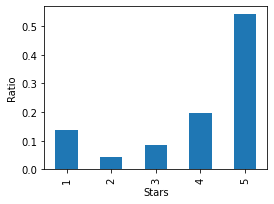

In [8]:
plot_labels(Rating, "stars")

##### The dataset is imbalanced.

In [9]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,This is the best laptop in this range.I reciev...,500
1,5,Good product as used of now.... Everything is ...,271
2,5,AWESOME LAPTOP. It supports many high spec gam...,96
3,4,For that price... it's exceptionally good. Pla...,342
4,4,RAM upgrade is must do because the useable RAM...,502


##### We have created another column length based on the length of reviews.

In [10]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30807 entries, 0 to 30806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      30807 non-null  int64 
 1   Full_review  30807 non-null  object
 2   length       30807 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 722.2+ KB


In [11]:
Rating.isnull().sum()

Ratings        0
Full_review    0
length         0
dtype: int64

<AxesSubplot:>

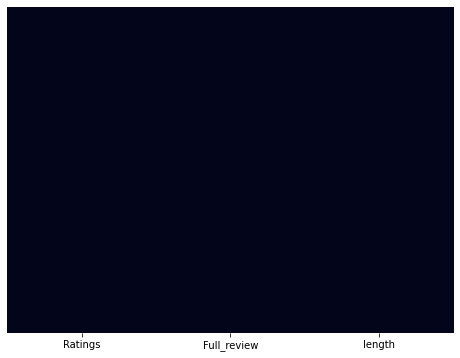

In [12]:
#Visualizing missing values if any through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(Rating.isnull(),yticklabels=False,cbar=False)

# Observation:
    Thus we confirm that there are no missing values present in our dataset.

In [13]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [14]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
#remove punctuation
Rating['Full_review']=Rating['Full_review'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
Rating['Full_review']=Rating['Full_review'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
Rating['Full_review']=Rating['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [16]:
Rating.head()

,Ratings,Full_review,length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,for that price it s exceptionally good played ...,342
4,4,ram upgrade is must do because the useable ram...,502


In [17]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

Rating['Full_review'] = Rating['Full_review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [18]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [19]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,best laptop range recieved late delivery due b...,500,337
1,5,good product used everything good also ssd slo...,271,150
2,5,awesome laptop supports many high spec games l...,96,84
3,4,price exceptionally good played far cry numbr ...,342,254
4,4,ram upgrade must useable ram numbrgb ryzen num...,502,393


In [20]:
print('original Review length', Rating.length.sum())
print('clean Review length', Rating.clean_length.sum())

original Review length 1916872
clean Review length 1363269


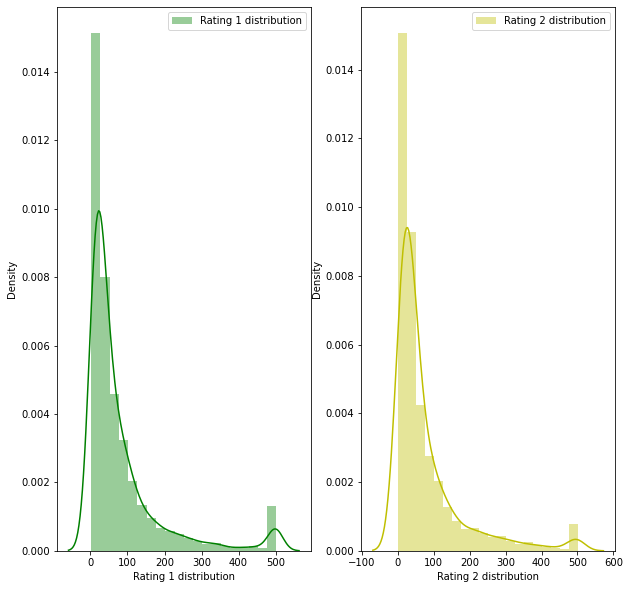

In [21]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='g')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

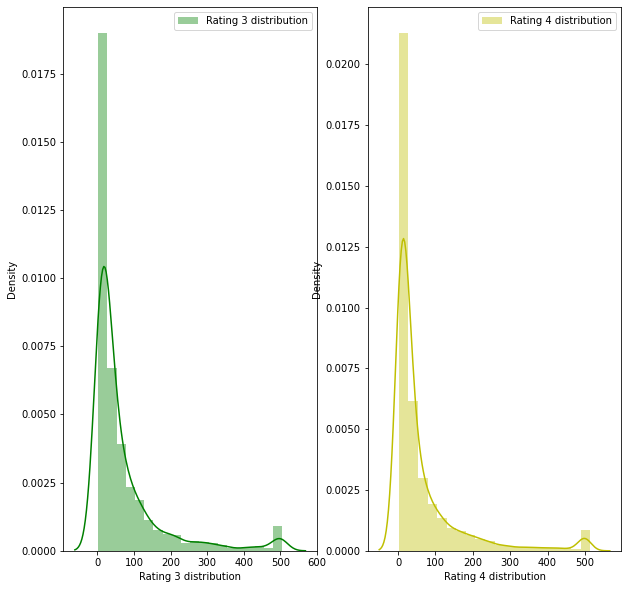

In [22]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='y')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

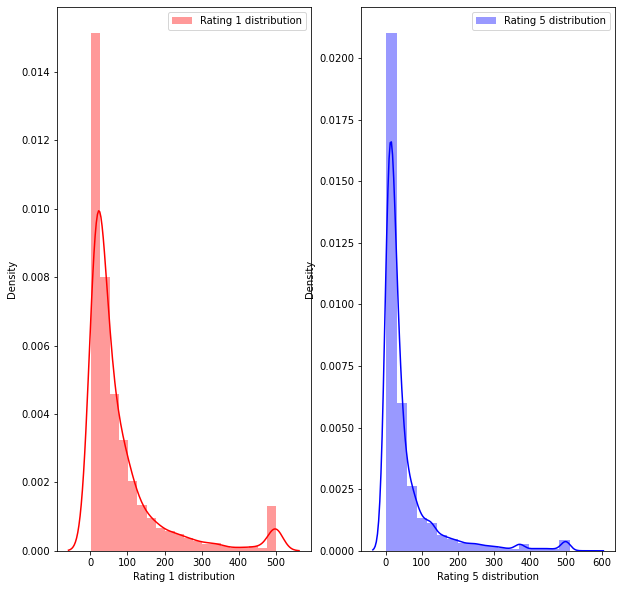

In [23]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

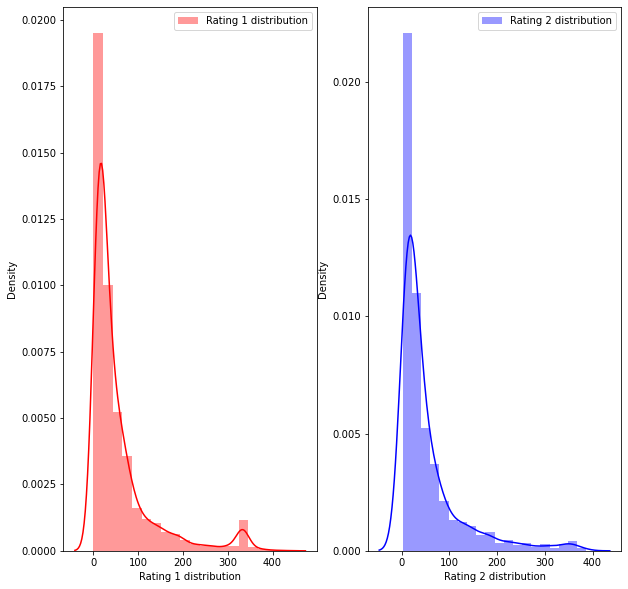

In [24]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='b')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

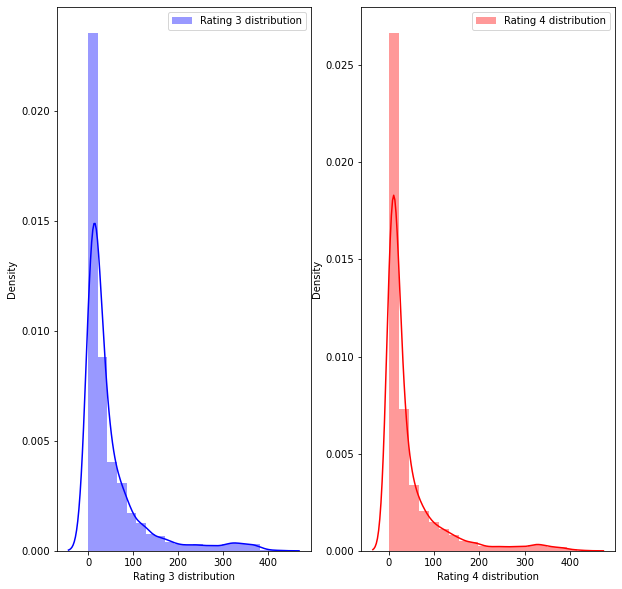

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='b')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

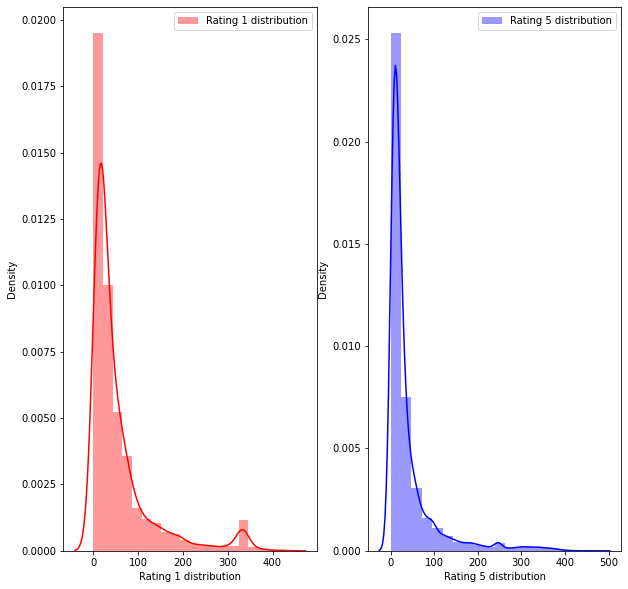

In [26]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

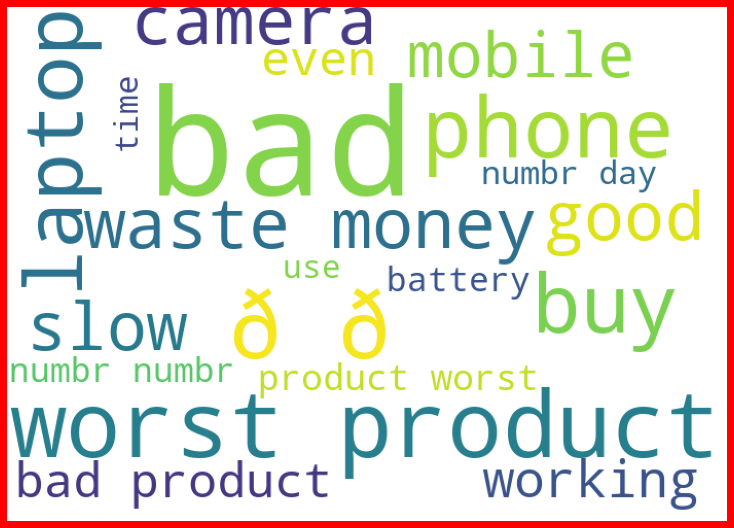

In [27]:
#getting sense of review Loud words in Rating 1
from wordcloud import WordCloud

Rating1=Rating['Full_review'][Rating['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

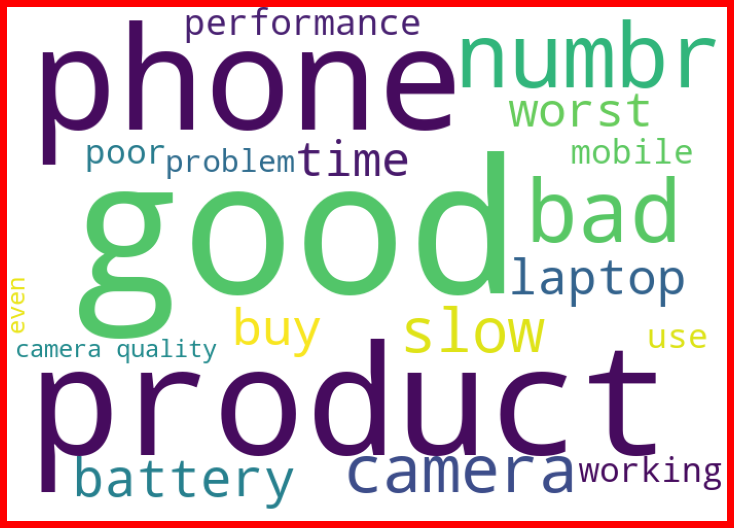

In [28]:
#getting sense of review Loud words in Rating 2

Rating2=Rating['Full_review'][Rating['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

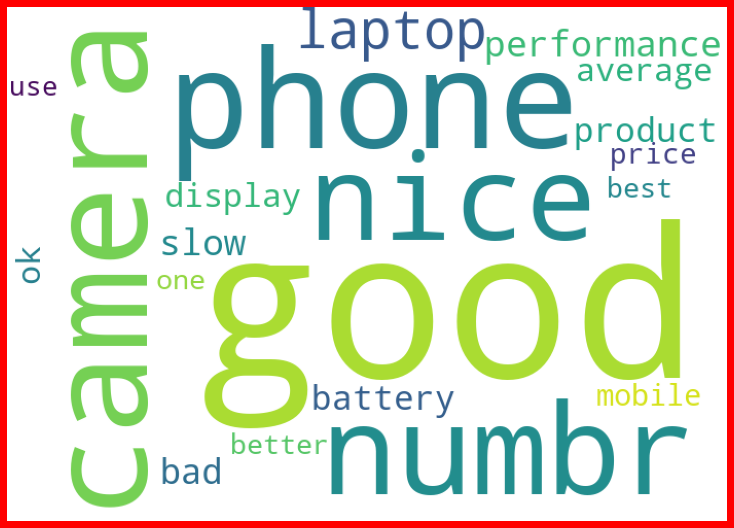

In [29]:
#getting sense of review Loud words in Rating 3

Rating3=Rating['Full_review'][Rating['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

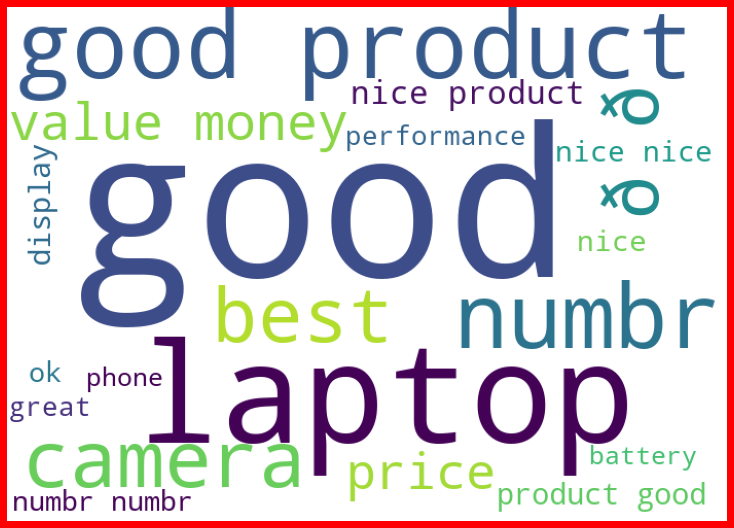

In [30]:
#getting sense of review Loud words in Rating 4

Rating4=Rating['Full_review'][Rating['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

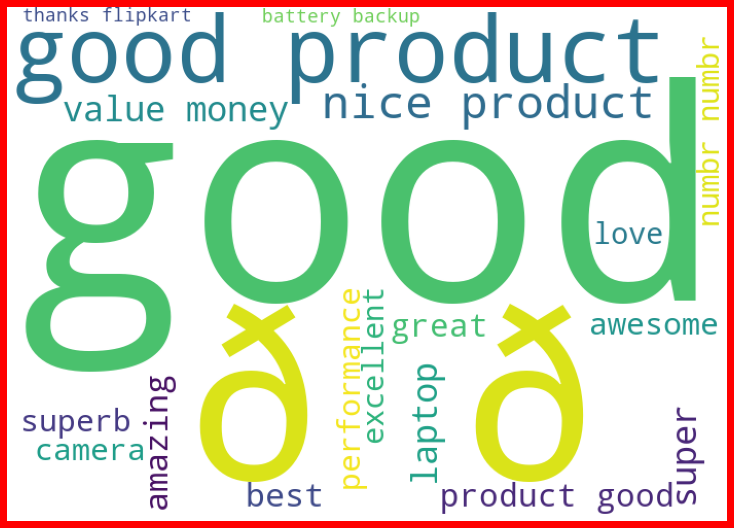

In [31]:
#getting sense of review Loud words in Rating 5

Rating5=Rating['Full_review'][Rating['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [33]:
x=feature1

In [34]:
y=Rating['Ratings']

In [35]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [36]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


# transform the dataset
os=SMOTE(sampling_strategy = {1: 22132, 2: 22132, 3: 22132, 4: 22132, 5: 22132})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 13378, 4: 4807, 1: 3350, 3: 2070, 2: 1040})
The number of classes after fit Counter({5: 22132, 1: 22132, 4: 22132, 2: 22132, 3: 22132})


In [40]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [41]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [42]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.4199935086011035


Cross_Val_Score =  0.5311442038973685


classification_report
               precision    recall  f1-score   support

           1       0.45      0.55      0.50       835
           2       0.08      0.30      0.12       245
           3       0.21      0.17      0.18       566
           4       0.28      0.43      0.34      1211
           5       0.78      0.43      0.56      3305

    accuracy                           0.42      6162
   macro avg       0.36      0.38      0.34      6162
weighted avg       0.55      0.42      0.45      6162



[[ 461  239   52   51   32]
 [ 108   74   23   29   11]
 [ 103  125   94  166   78]
 [  99  184  108  525  295]
 [ 244  352  176 1099 1434]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCl

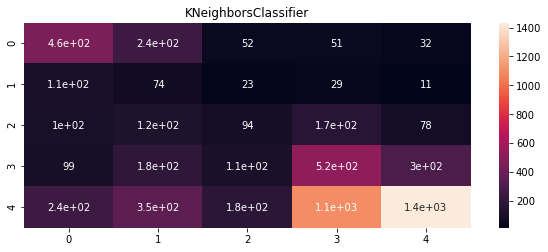

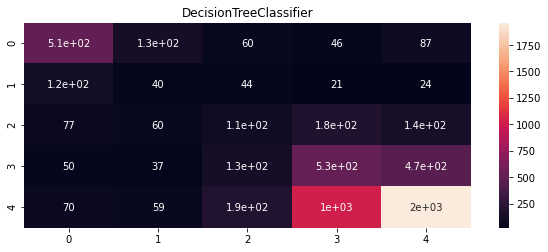

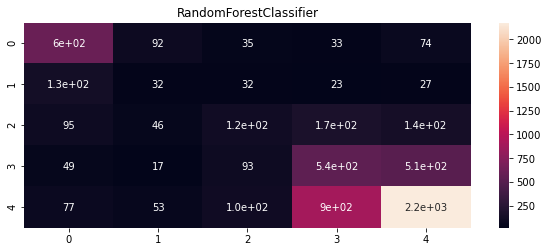

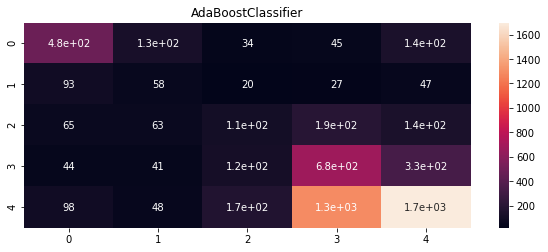

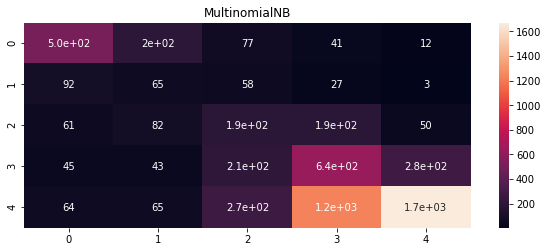

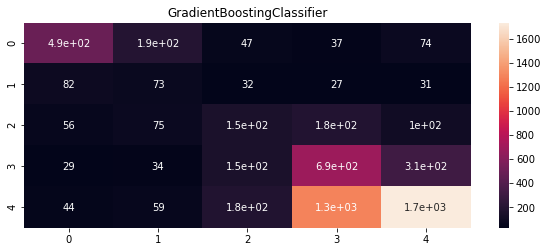

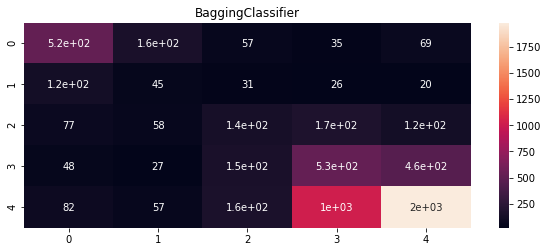

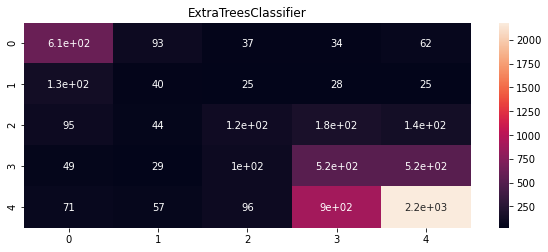

In [43]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_ns,y_train_ns)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [44]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,41.999351,53.114420
1,DecisionTreeClassifier,50.989938,58.161991
2,RandomForestClassifier,56.231743,63.118645
3,AdaBoostClassifier,49.058747,62.219620
4,MultinomialNB,49.740344,61.995489
5,GradientBoostingClassifier,50.860110,62.307114
6,BaggingClassifier,51.996105,60.463511
7,ExtraTreesClassifier,56.199286,63.076473


##### Hyper Parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x_train_ns,y_train_ns)
print(clf.best_params_)

KeyboardInterrupt: 

##### Not able to perform hyper paramter tuning as it was taking more than 12 hours to give the output, so I prefer to interrupt the kernal & perform manaul tuning to check if i can increase the score, which also dint increased, so keeping the original score.

In [46]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.5507951963648167
[[ 601  105   40   36   53]
 [ 115   49   35   22   24]
 [  83   59  149  177   98]
 [  38   22  129  658  364]
 [  72   46  116 1134 1937]]
              precision    recall  f1-score   support

           1       0.66      0.72      0.69       835
           2       0.17      0.20      0.19       245
           3       0.32      0.26      0.29       566
           4       0.32      0.54      0.41      1211
           5       0.78      0.59      0.67      3305

    accuracy                           0.55      6162
   macro avg       0.45      0.46      0.45      6162
weighted avg       0.61      0.55      0.57      6162



In [47]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,41.999351,53.114420
1,DecisionTreeClassifier,50.989938,58.161991
2,RandomForestClassifier,56.231743,63.118645
3,AdaBoostClassifier,49.058747,62.219620
4,MultinomialNB,49.740344,61.995489
5,GradientBoostingClassifier,50.860110,62.307114
6,BaggingClassifier,51.996105,60.463511
7,ExtraTreesClassifier,56.199286,63.076473


##### Random forest classifier is giving the best results so we save it as our final model.

In [48]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [49]:
model=joblib.load('Ratings_prediction.csv')

In [50]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[4 2 3 5 1 1 3 5 5 5 4 5 5 1 4 5 5 3 4 5 4 1 5 2 5 4 4 5 3 1 4 4 1 1 4 5 5
 5 5 4 5 1 5 5 5 1 5 1 5 5 1 5 4 5 4 4 5 4 5 4 1 4 1 4 5 3 5 5 5 4 5 5 1 1
 5 1 4 4 5 5 5 5 5 5 5 4 5 4 5 5 1 5 1 5 1 1 4 5 5 1 5 4 1 4 5 5 4 5 4 1 5
 4 5 5 5 5 5 4 5 5 1 1 5 5 5 4 4 4 4 1 5 4 5 3 5 4 5 1 4 5 4 1 5 5 5 4 5 5
 4 4 1 5 5 5 2 5 3 1 5 1 5 1 2 4 5 1 3 5 3 5 3 4 5 4 5 5 5 5 5 4 5 5 4 2 5
 5 4 5 4 4 4 3 4 5 5 5 4 5 5 4 5 4 5 5 2 5 4 5 3 1 5 2 1 1 5 2 5 4 4 4 1 2
 4 5 4 5 5 4 5 5 1 5 5 1 5 4 5 1 2 4 5 5 5 5 1 3 5 1 4 5 5 1 4 2 5 4 1 5 3
 5 5 5 3 5 5 5 5 2 4 4 5 5 5 1 5 2 5 5 1 5 4 5 4 5 2 2 5 4 5 2 4 5 5 4 5 1
 5 3 5 1 5 3 3 4 1 3 1 4 1 5 1 5 1 5 5 5 4 5 5 5 1 4 5 5 5 4 5 5 5 5 5 4 5
 5 4 5 5 5 5 5 5 1 5 5 5 5 2 5 4 1 5 1 5 1 1 4 4 4 4 5 1 4 5 5 4 5 4 5 4 5
 5 4 5 5 4 4 5 1 4 4 4 1 4 5 1 4 1 5 5 1 5 5 5 4 5 4 5 5 4 4 1 5 1 3 3 5 3
 5 4 5 4 5 5 4 5 5 4 5 4 3 5 4 5 5 2 1 4 1 5 1 3 1 5 5 4 3 5 5 1 4 5 5 5 4
 4 5 5 4 5 5 4 5 5 4 3 5 1 1 5 3 4 5 5 1 1 5 5 4 4 5 5 1 5 4 4 5 4 5 5 4 5
 4 5 4 2 4 4 1 5 1 4 5 4 